# 10: 量子フーリエ変換

In [1]:
from renom_q import *
import math

## 10-1: 量子フーリエ変換 $QFT_4$

一般的な$n$量子ビットの場合の$N=2^n$となる量子フーリエ変換$QFT_N$

$$\left| x \right\rangle \xrightarrow{QFT_N} \frac{1}{\sqrt{N}} \sum^{N-1}_{y=0} \omega^{x \cdot y} \left| y \right\rangle $$

$\omega = \exp{(2\pi i / N)}$は回転の位相を表す。

10進数を$j$とすると、
$$\left| j \right\rangle \xrightarrow{QFT_N} \frac{1}{\sqrt{N}} \left( \left| 0 \right\rangle + e^{2\pi i 0.j_n} \left| 1 \right\rangle \right) \otimes \left( \left| 0 \right\rangle + e^{2\pi i 0.j_{n-1} j_n} \left| 1 \right\rangle \right) \otimes \dots \otimes \left( \left| 0 \right\rangle + e^{2\pi i 0.j_1 j_2 \dots j_{n-1} j_n} \left| 1 \right\rangle \right)$$
と表せる。

$N=4$の量子フーリエ変換は、
$$\left| x_1 x_2 \right\rangle \xrightarrow{QFT_4} \frac{1}{\sqrt{4}} \left( \left| 0 \right\rangle + e^{2\pi i 0.x_2} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2} \left| 1 \right\rangle \right)$$

たとえば$\left| 10 \right\rangle$の量子フーリエ変換は、
$$\left| 10 \right\rangle \xrightarrow{QFT_4} \frac{1}{\sqrt{4}} \left( \left| 0 \right\rangle + e^{2\pi i 0.0} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.10} \left| 1 \right\rangle \right) = \frac{1}{2}\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) = \frac{1}{2}\left( \left| 00 \right\rangle - \left| 01 \right\rangle + \left| 10 \right\rangle - \left| 11 \right\rangle \right) = \frac{1}{2}\left( \left| 0 \right\rangle - \left| 1 \right\rangle + \left| 2 \right\rangle - \left| 3 \right\rangle \right)$$

{'00': 245, '01': 246, '10': 268, '11': 265}


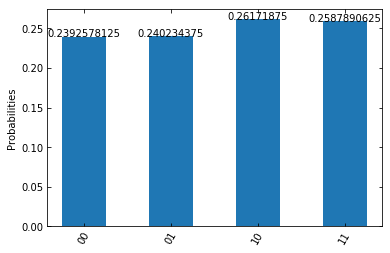

In [2]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

qc.x(q[0])
qc.h(q[0])
qc.cu1(math.pi/2, q[0], q[1])
qc.h(q[1])

qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

量子フーリエ変換後は上位ビットと下位ビットが逆転しているので、swapゲートで上下を入れ替える必要がある。

{'00': 257, '01': 253, '10': 268, '11': 246}


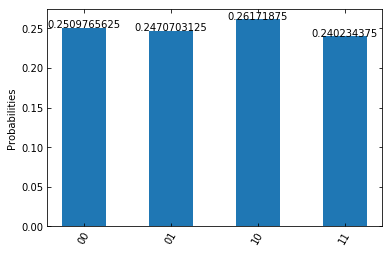

In [3]:
def swap(qci, s1, s2):
    qci.cx(q[s1], q[s2])
    qci.cx(q[s2], q[s1])
    qci.cx(q[s1], q[s2])

bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

qc.x(q[0])
qc.h(q[0])
qc.cu1(math.pi/2, q[0], q[1])
qc.h(q[1])
swap(qc, 0, 1)
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

## 10-2: 量子フーリエ変換 $QFT_{N}$

量子フーリエ変換の量子ゲートは、制御位相回転ゲート$cR_n$を用いる。
$$cR_n=cU_1\left(\frac{2\pi}{2^n}\right)= \left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i(2\pi/2^n)}
\end{array}
\right)$$

$N=16$の量子フーリエ変換は、
$$\left| x_1 x_2 x_3 x_4 \right\rangle \xrightarrow{QFT_{16}} \frac{1}{\sqrt{16}} \left( \left| 0 \right\rangle + e^{2\pi i 0.x_4} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_3 x_4} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_2 x_3 x_4} \left| 1 \right\rangle \right) \left( \left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2 x_3 x_4} \left| 1 \right\rangle \right)$$となる。

制御位相回転ゲート$cR_4$は、
$$cR_4=cU_1\left(\frac{2\pi}{2^4}\right)= \left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i(\pi/8)}
\end{array}
\right)$$
となる。

{'0000': 1024}


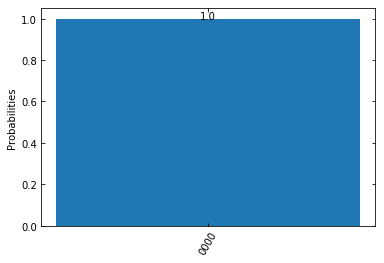

In [4]:
def qft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(math.pi/float(2**(i-j)), q[j], q[i])
        qci.h(q[i])

bn = 4
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])

qft(qc, q, bn)
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)

## 10-3: 逆量子フーリエ変換 $QFT^{-1}_{N}$

一般的な$n$量子ビットの場合の$N=2^n$となる逆量子フーリエ変換$QFT^{-1}_N$

$$\left| x \right\rangle \xrightarrow{QFT_{N^{-1}}} \frac{1}{\sqrt{N}} \sum^{N-1}_{y=0} \omega^{-x \cdot y} \left| y \right\rangle $$

制御位相回転ゲートのエルミート共役$cR^{\dagger}_n$を用いる。
$$cR^{\dagger}_n=cU_1\left(-\frac{2\pi}{2^n}\right)= \left(
\begin{array}{rrrr}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{-i(2\pi/2^n)}
\end{array}
\right)$$

$N=16$の逆量子フーリエ変換は、
$$\left| 0000 \right\rangle \xrightarrow{H \otimes H \otimes H \otimes H} 
= \frac{\left| 0 \right\rangle + e^{2\pi i0.0}\left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle + e^{2\pi i0.00}\left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle + e^{2\pi i0.000}\left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle + e^{2\pi i0.0000}\left| 1 \right\rangle}{\sqrt{2}} \xrightarrow{QFT^{-1}_{16}} \left| 0000 \right\rangle$$
となる。

{'0000': 1024}


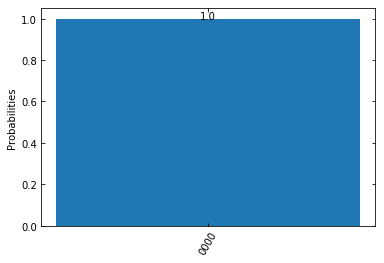

In [5]:
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-math.pi/float(2**(i-j)), q[j], q[i])
        qci.h(q[i])
        
bn = 4
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])

iqft(qc, q, bn)
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)